##**Homework 1 Planar Manipulator**
There three questions in this homework. We have given you a starter code for all the questions. You only need to fillout the missing parts marked with "Fill in your code here".

# The Two-link Planar Manipulator 


<img src="https://raw.githubusercontent.com/RussTedrake/manipulation/master/figures/exercises/planar_two_link.png" width="700">





In [2]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline


# Q.1 Derive the forward kinematics of the above two DoF planar manipulator.[10 pts]


In [16]:
def forward_kinematics(q, l1=1, l2=1):
  q0, q1 = q
  x = l1 * np.cos(q0) + l2 * np.cos(q0 + q1) # Fill your code here
  y = l2 * np.sin(q0) + l2 * np.sin(q0 + q1) # Fill your code here 
  return np.array([x,y])

**You can use the provided function below to visualize the robot. It depends on your implementation of the forward kinematics function.**


In [17]:
def plot_planar_manipulator(q, l1, l2, eff_path=None):
  fig= plt.figure(figsize=(10,10))
  ax = plt.subplot(1,1,1)   

  link1, = ax.plot([], [], 'b', lw=10)     # ax.plot returns a list of 2D line objects
  link2, = ax.plot([], [], 'r', lw=10)
  eff, = ax.plot([], [], 'g', marker='o', markersize=15)
  if eff_path is not None:
    ep, = ax.plot(eff_path[:, 0], eff_path[:, 1], 'g-') 
  ax.set_xlim(( -2.5, 2.5))            
  ax.set_ylim((-2.5, 2.5))
  txt_title = ax.set_title('')
  def drawFrame(k):
    k = 100*k
    q0, q1 = q[k]

    rA = [0, 0]
    rB = [l1*np.cos(q0), l2*np.sin(q0)]
    rC = forward_kinematics(q[k, :], l1, l2)

    link1.set_data([rA[0], rB[0]], [rA[1], rB[1]])
    link2.set_data([rB[0], rC[0]], [rB[1], rC[1]])
    eff.set_data([rC[0], rC[0]],[rC[1], rC[1]])
    return link1, link2, eff
  anim = animation.FuncAnimation(fig, drawFrame, frames=75, interval=100, blit=True)
  return anim



In [18]:
def test_forward_kinematics():
  """
  Test function for Forward kinematics
  """
  test_configurations = np.zeros((4, 2))
  test_configurations[:, 0] = np.linspace(0, np.pi, 4)
  test_configurations[:, 1] = np.linspace(0, np.pi, 4)
  test_res = np.zeros((4, 2))
  sol = np.array([[ 2.00000000e+00, 0.00000000e+00],
                  [ 3.33066907e-16,  1.73205081e+00],
                  [-1.00000000e+00,  3.33066907e-16],
                  [ 0.00000000e+00, -1.22464680e-16]])
  for i in range(4):
    test_res[i, :] = forward_kinematics(test_configurations[i])
  if np.allclose(test_res, sol):
    print('Your FK implementation is correct!!')
  else:
    print('FK implemenation is wrong!')

In [19]:
test_forward_kinematics()

Your FK implementation is correct!!


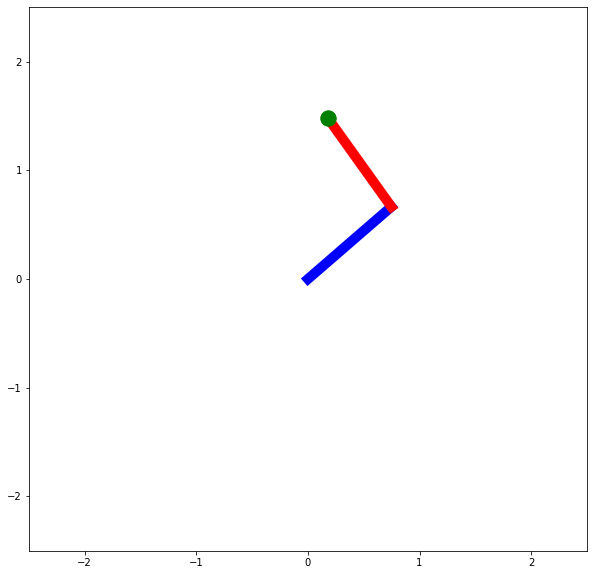

In [20]:
N = 8000
L1 = 1
L2 = 1
q1 = np.linspace(0, np.pi/4, N)
q2 = np.linspace(0, np.pi/2, N)
q = np.zeros((N, 2))
q[:, 0] = q1
q[:, 1] = q2
anim = plot_planar_manipulator(q, L1, L2)
HTML(anim.to_html5_video())

# Q.2 Derive the analytical Inverse kinematics of the above two DoF manipulator.[20 pts]

In [24]:
def inverse_kinematics(x, y, l1, l2):
  q1 = np.arccos((np.square(x) + np.square(y) - np.square(l1) - np.square(l2)) / (2 * l1 * l2)) #fill in your code here 
  q0 = np.arctan(y / x) - np.arccos((np.square(l1) - np.square(l2) + np.square(x) + np.square(y)) / (2 * l1 * np.sqrt(np.square(x) + np.square(y))))#fill in your code here 
  return np.array([q0, q1])

In [25]:
def test_inverse_kinematics(l1, l2):
  """
  Test function for Inverse Kinematics
  """
  x = 0.7 + np.linspace(0, 0.1, 4)
  y = 0.7 + np.linspace(0, 0.1, 4)
  sol = np.array([[-0.2675924,   2.10598112],
                  [-0.24024978,  2.05129588],
                  [-0.21244591,  1.99568815],
                  [-0.18413395, 1.93906422]])
  test_res = inverse_kinematics(x, y, l1, l2).T
  if np.allclose(test_res, sol):
    print('Your IK implementation is correct!!')
  else:
    print('Yours: ', test_res)
    print('Soln: ', sol)
    print('IK implemenation is wrong!')

**You can check the correctness of your code by calling the provided test function**

In [26]:
test_inverse_kinematics(L1, L2)

Your IK implementation is correct!!


# Q.3 Trace a circle with the end-effector of the robot [5 pts]


**Trace a circle of radius $r = 0.4$ with origin at $(0.7, 0.7)$ with the end-effector of the robot.**

**Hint: Use the following definition of the equation of a cicle of raduis $r$ and origin at $(x_0, y_0)$.** 
$$x = x_0 + r*cos(\theta)$$
$$x = y_0 + r*sin(\theta)$$
Where $\theta \in [0, 2\pi]$

**Plot q1 and q2** 

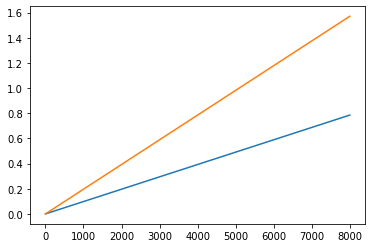

In [29]:
r = 0.4
theta = np.linspace(0, 2*np.pi, N) 
x = 0.7 #fill in your code
y = 0.7 #fill in your code
q_ik = inverse_kinematics(x, y, 1, 1).T
#Plot q1
#fill your code here
#Plot q2
#fill your code here
plt.show()


**Animate the manipulator**

IndexError: ignored

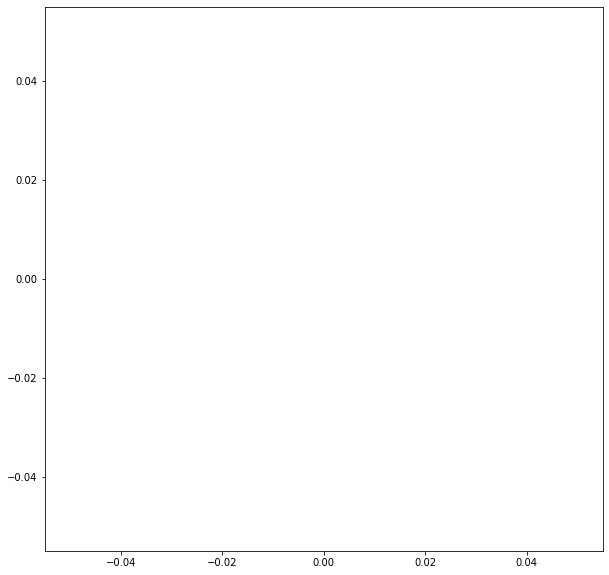

In [30]:
anim = plot_planar_manipulator(q_ik, L1, L2, eff_path=np.array([x,y]).T)
HTML(anim.to_html5_video())